<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Avalia%C3%A7%C3%A3o_Op%C3%A7%C3%B5es%2024_04_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vectorbt

In [ ]:
!pip install mplfinance

In [ ]:
import numpy as np
import pandas as pd
import vectorbt as vbt
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams
import mplfinance as mpf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Opções =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_23_04_24_to_21_06.xlsx",)
Opções.head(5)

,Último,U%,Preço Teórico,Volume,Delta,Intrínseco,Taxa,Bid,Ask,Strike,...,Bid.1,Ask.1,Taxa.1,Intrínseco.1,Delta.1,Volume.1,Preço Teórico.1,PT%,Último.1,U1%
0,10.34,0.251704,10.72,"2,05k",0.99,10.17,0.2492,0.0,0.0,31.33,...,0.01,0.11,0.0014,0.0,-0.01,660,0.01,0.000243,0.12,0.002921
1,8.80,0.214216,10.47,"7,01k",0.99,9.92,0.2120,0.0,0.0,31.58,...,0.01,0.46,0.0057,0.0,-0.01,"1,05k",0.01,0.000243,0.11,0.002678
2,9.22,0.224440,9.99,"21,21k",0.99,9.42,0.2222,0.0,11.0,32.08,...,0.06,0.20,0.0031,0.0,-0.01,"1,95k",0.02,0.000487,0.13,0.003165
3,9.10,0.221519,9.75,910,0.99,9.17,0.2193,0.0,0.0,32.33,...,0.10,0.50,0.0072,0.0,-0.01,565,0.02,0.000487,0.21,0.005112
4,8.55,0.208130,9.50,"63,10k",0.99,8.92,0.2060,0.0,0.0,32.58,...,0.08,1.95,0.0245,0.0,-0.01,"1,84k",0.02,0.000487,0.14,0.003408


In [ ]:
#Opções1 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_04_12_23_to_15_12.xlsx",)
#Opções1.head(5)

In [ ]:
#Opções2 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_04_12_23_to_15_12.xlsx",)
#Opções2.head(5)

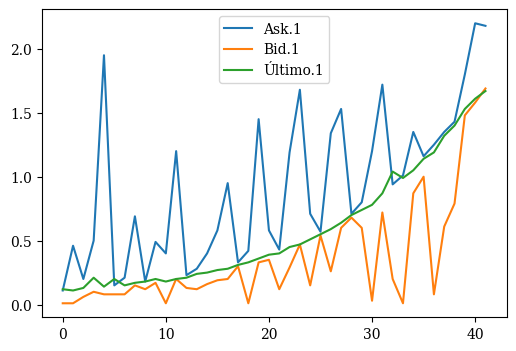

In [ ]:
# Ask são os vendedores
# Bid são os compradores
# Último valor negociado
PUTs_OTM = Opções[(Opções['Intrínseco.1']<=0.5)]
PUTs_OTM1 = Opções[(Opções['Intrínseco.1']<=0)]
#PUTs_OTM2 = Opções2[(Opções2['Intrínseco.1']<=0.5)]
PUTs_OTM[['Ask.1','Bid.1','Último.1']].plot(figsize = (6,4));

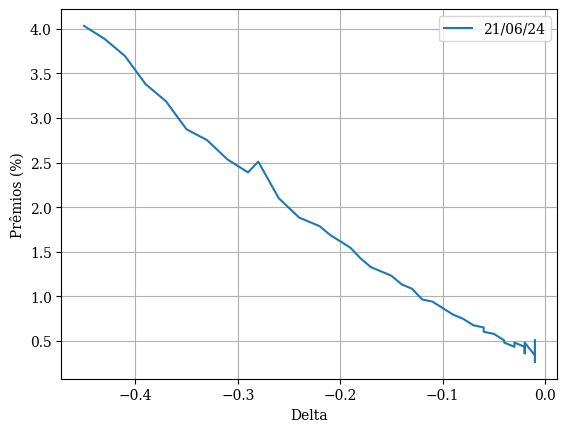

In [ ]:
Ativo = 41.41
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Ask.1']]*100/Ativo,label='Ask')
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Bid.1']]*100/Ativo,label='Bid')
plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Último.1']]*100/Ativo,label='21/06/24')
#plt.plot(PUTs_OTM1[['Delta.1']],PUTs_OTM1[['Último.1']]*100/Ativo,label='15/12/23')
#plt.plot(PUTs_OTM1[['Delta.1']],PUTs_OTM1[['Último.1']]*100/Ativo,label='15/12/23-Hoje')
plt.legend()
plt.grid()
plt.xlabel('Delta')
plt.ylabel('Prêmios (%)')
plt.show()

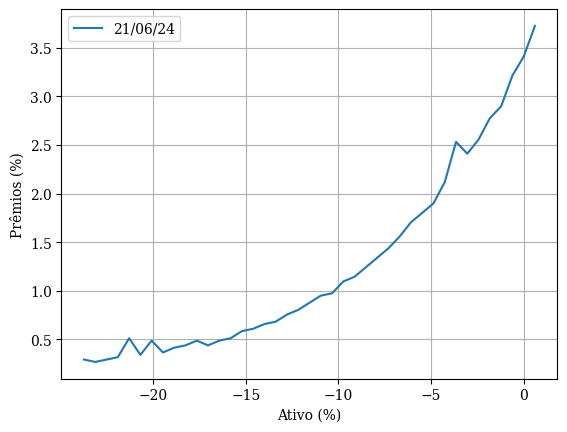

In [ ]:
plt.plot(PUTs_OTM1[['Stk%']]*100,PUTs_OTM1[['U1%']]*100,label='21/06/24')
plt.legend()
plt.grid()
plt.xlabel('Ativo (%)')
plt.ylabel('Prêmios (%)')
plt.show()

In [ ]:
# A mesma análise para as Calls
CALLs_OTM = Opções[(Opções['Intrínseco']<=0.5)]
CALLs_OTM1 = Opções[(Opções['Intrínseco']<=0)]

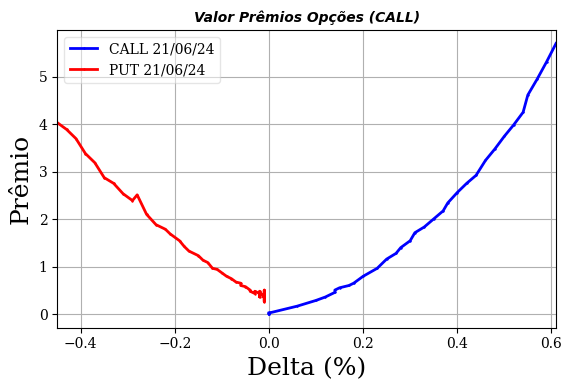

In [ ]:
# A mesma análise para as Calls
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(6,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Ask']*100/Ativo,  label='Vendedor', color='blue',linestyle='dashed', linewidth=2)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Bid']*100/Ativo,  label='Comprador', color='red', linestyle='dashed', linewidth=2)
plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Último']*100/Ativo,  label='CALL 21/06/24', color='blue', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM['Delta.1'],PUTs_OTM['Último.1']*100/Ativo,  label='PUT 21/06/24', color='red', marker='+', linewidth=2, markersize=2)
#plt.plot(CALLs_OTM1['Delta'],CALLs_OTM1['Último']*100/Ativo,  label='CALL 15/12/23', color='orange', marker='+',linestyle='dashed', linewidth=2, markersize=2)
#plt.plot(PUTs_OTM1['Delta.1'],PUTs_OTM1['Último.1']*100/Ativo,  label='PUT 15/12/23', color='orange', marker='+',linestyle='dashed', linewidth=2, markersize=2)
#plt.plot(CALLs_OTM2['Delta'],CALLs_OTM2['Último']*100/Ativo,  label='CALL 15/12/23', color='orange', marker='+',linestyle='dashed', linewidth=2, markersize=2)
#plt.plot(PUTs_OTM2['Delta.1'],PUTs_OTM2['Último.1']*100/Ativo,  label='PUT 15/12/23', color='orange', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

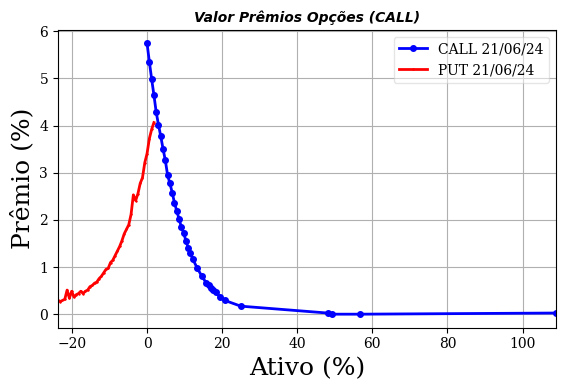

In [ ]:
# A mesma análise para as Calls em função do preço do ativo
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(6,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Ativo (%)',fontsize=18)
plt.ylabel('Prêmio (%)',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Ask']*100/Ativo,  label='Vendedor', color='blue',linestyle='dashed', linewidth=2)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Bid']*100/Ativo,  label='Comprador', color='red', linestyle='dashed', linewidth=2)
plt.plot(CALLs_OTM['Stk%']*100,CALLs_OTM['U%']*100,  label='CALL 21/06/24', color='blue', marker='o', linewidth=2, markersize=4)
#plt.plot(CALLs_OTM1['Strike'],CALLs_OTM1['Último']*100/Ativo,  label='CALL 15/12/23', color='orange', marker='o', linewidth=2, markersize=4)
plt.plot(PUTs_OTM['Stk%']*100,PUTs_OTM['U1%']*100,  label='PUT 21/06/24', color='red', marker='+', linewidth=2, markersize=2)
#plt.plot(PUTs_OTM1['Strike'],PUTs_OTM1['Último.1']*100/Ativo,  label='PUT 15/12/23', color='orange', marker='+', linewidth=2, markersize=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()